<a href="https://colab.research.google.com/github/vaishhhx/Machine-Learning/blob/main/Spam_Email_Detection_using_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing necessary libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/My Drive/Dataset

/content/drive/My Drive/Dataset


In [4]:
# Read dataset from drive
data = pd.read_csv("spam emails.csv")
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
data.Category.value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [6]:
data['spam'] = data['Category'].apply(lambda x: 1 if x =='spam' else 0)

In [7]:
data.shape

(5572, 3)

In [8]:
data.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.Message, data.spam, test_size=0.2)

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()

X_train_cv = v.fit_transform(X_train.values)
X_train_cv

<4457x7755 sparse matrix of type '<class 'numpy.int64'>'
	with 59217 stored elements in Compressed Sparse Row format>

In [12]:
X_train_cv.toarray()[:2][0]

array([0, 0, 0, ..., 0, 0, 0])

In [13]:
X_train_cv.shape

(4457, 7755)

In [14]:
v.get_feature_names_out()[1771]

'checkin'

In [15]:
v.vocabulary_

{'me': 4419,
 'too': 6985,
 'watching': 7409,
 'surya': 6651,
 'movie': 4620,
 'only': 4949,
 'after': 869,
 'pm': 5267,
 'vijay': 7298,
 'pokkiri': 5292,
 'if': 3615,
 'we': 7425,
 'win': 7531,
 'its': 3777,
 'really': 5619,
 'no': 4801,
 'side': 6169,
 'for': 2959,
 'long': 4210,
 'time': 6914,
 'also': 945,
 'andros': 986,
 'ice': 3597,
 'etc': 2673,
 'spoke': 6411,
 'with': 7557,
 'uncle': 7144,
 'john': 3852,
 'today': 6950,
 'he': 3381,
 'strongly': 6546,
 'feels': 2830,
 'that': 6825,
 'you': 7718,
 'need': 4734,
 'to': 6944,
 'sacrifice': 5878,
 'keep': 3923,
 'here': 3427,
 'going': 3191,
 'call': 1623,
 'when': 7492,
 'does': 2407,
 'beg': 1314,
 'just': 3889,
 'listen': 4162,
 'dont': 2432,
 'make': 4341,
 'any': 1014,
 'promises': 5463,
 'or': 4978,
 'it': 3771,
 'clear': 1853,
 'things': 6858,
 'are': 1069,
 'not': 4836,
 'easy': 2542,
 'and': 981,
 'please': 5251,
 'let': 4103,
 'us': 7222,
 'work': 7601,
 'out': 5012,
 'as': 1107,
 'expecting': 2734,
 'help': 3415,
 'my'

In [16]:
X_train_np = X_train_cv.toarray()
X_train_np[0]

array([0, 0, 0, ..., 0, 0, 0])

In [17]:
np.where(X_train_np[0]!=0)

(array([ 869, 4419, 4620, 4949, 5267, 5292, 6651, 6985, 7298, 7409]),)

In [20]:
X_train_np[0][1771]

0

In [21]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_cv, y_train)

MultinomialNB()

In [22]:
X_test_cv = v.transform(X_test)

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = model.predict(X_test_cv)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       961
           1       0.97      0.92      0.94       154

    accuracy                           0.98      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.98      0.98      0.98      1115



In [25]:
cnf = confusion_matrix(y_test, y_pred)

Text(0.5, 1.0, 'confusion matrix')

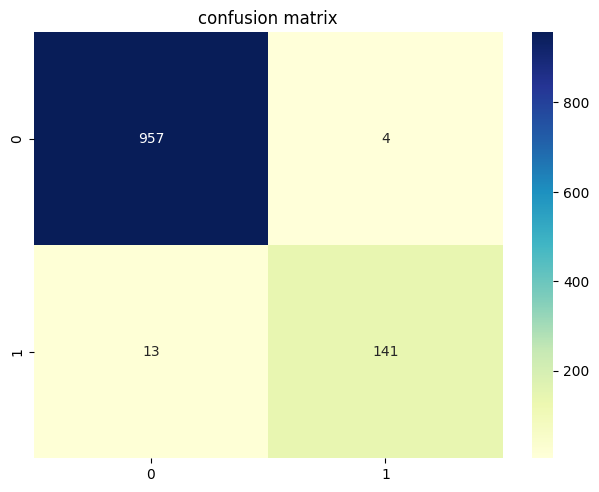

In [27]:
class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf), annot = True, cmap = "YlGnBu", fmt = 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('confusion matrix')

In [28]:
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.9847533632286996


In [29]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]

emails_count = v.transform(emails)
model.predict(emails_count)

array([0, 1])